## Überwachtes Lernen

Daten werden in ein Modell gefüttert, und dieses Modell erzeugt dann eine Vorhersage (Prediction).

Diese Vorhersage wird mit den richtigen Daten verglichen und daraus wird eine Genauigkeit (Accuracy) gebildet.

Loss: Ergebnis vom Training, dieses Ergebnis wird wieder in das Modell zurück gefüttert um es weiter zu trainieren.

## Datenset

Das MAGIC Gamma Telescope Set besteht aus Daten zu Partikeln die das Teleskop treffen. Es gibt dazu einen Rekorder, der die Daten dieser Partikel aufnimmt und speichert. Bei diesen Daten wird zwischen 2 Arten von Partikeln unterschieden:

- Gamma Strahlen
- Hadronen

Bei jedem Datensatz ist beschrieben um welchen Typen es sich handelt (G oder H)

Mit diesem Datenset können wir ein Machine Learning Modell schreiben, welches anhand dieser Daten (ohne Informationen über die Art dieses Teilchens) selbstständig erkennt um welche Art von Partikel es sich handelt.

- fLength: continuous # major axis of ellipse [mm]
- fWidth: continuous # minor axis of ellipse [mm]
- fSize: continuous # 10-log of sum of content of all pixels [in #phot]
- fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
- fConc1: continuous # ratio of highest pixel over fSize [ratio]
- fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
- fM3Long: continuous # 3rd root of third moment along major axis [mm]
- fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
- fAlpha: continuous # angle of major axis with vector to origin [deg]
- fDist: continuous # distance from origin to center of ellipse [mm]
- class: g,h # gamma (signal), hadron (background)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv("Data\Income.csv")

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Computer sind nicht sonderlich gut darin, Buchstaben zu verstehen -> Umwandlung zu Zahlen

In [15]:
def convertColumns(dataframe):
    for column in dataframe.columns:
        num = 0
        series = dataframe[column]
        for u in series.unique():
            dataframe.loc[column == u, column] = num
            num += 1

In [16]:
convertColumns(data)

KeyError: 'cannot use a single bool to index into setitem'

In [10]:
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


## Abweichungen finden zwischen den beiden Daten

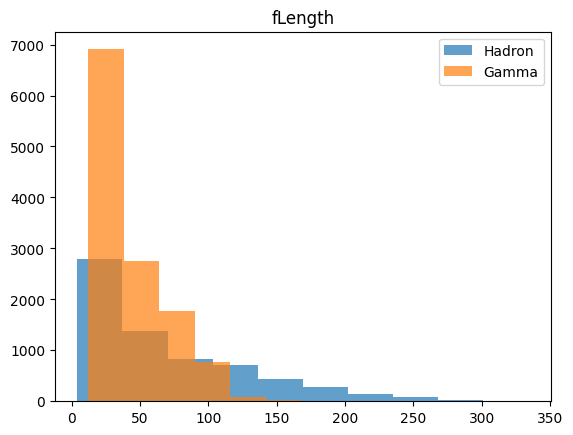

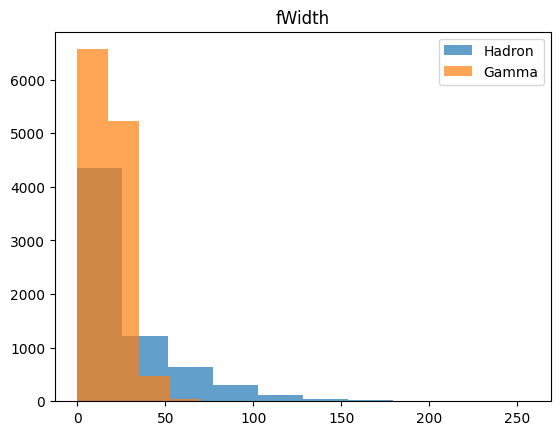

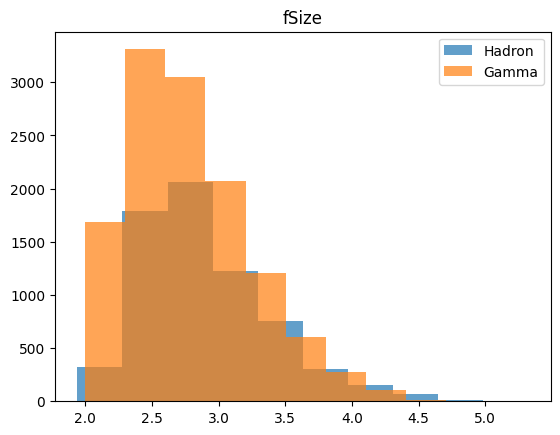

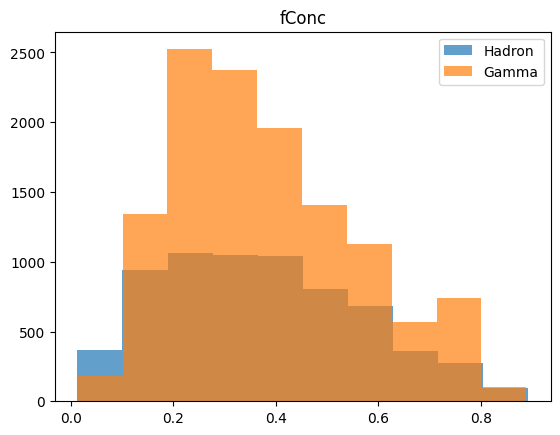

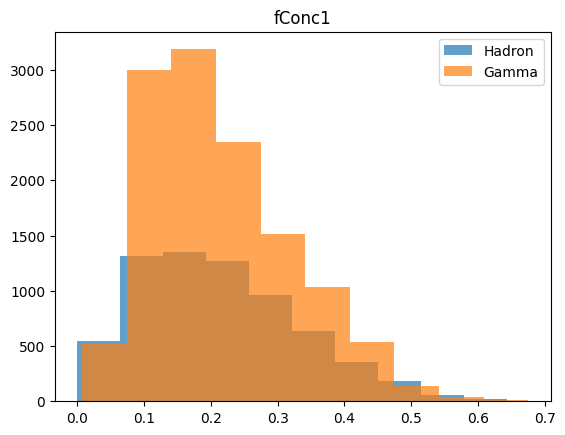

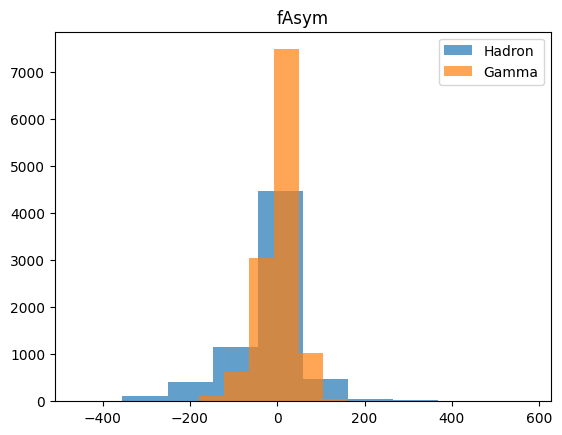

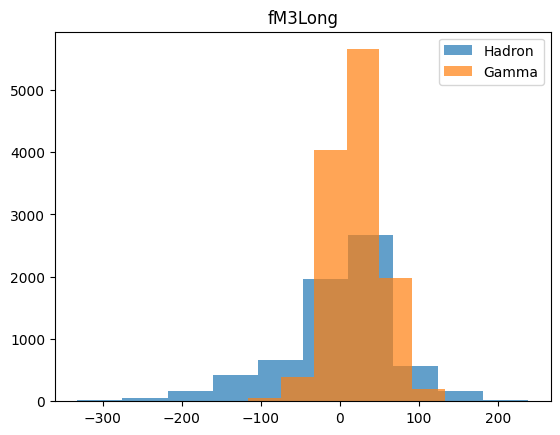

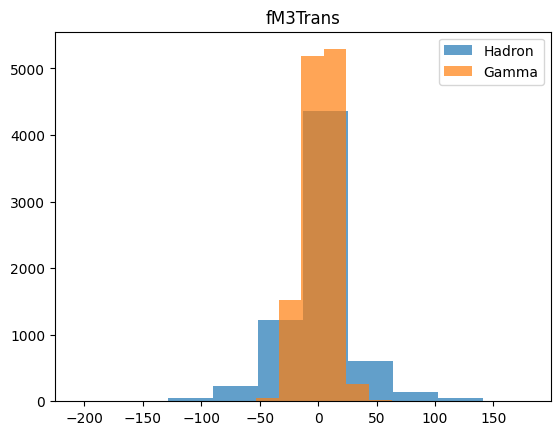

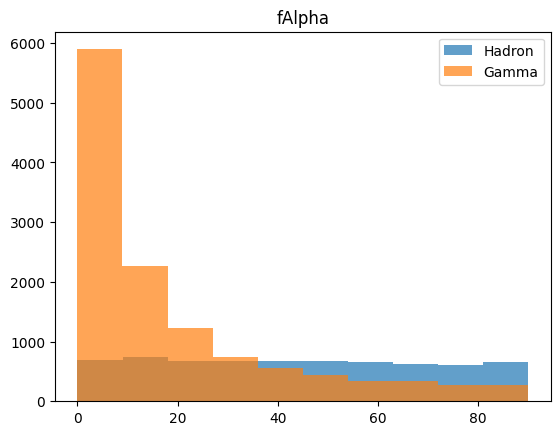

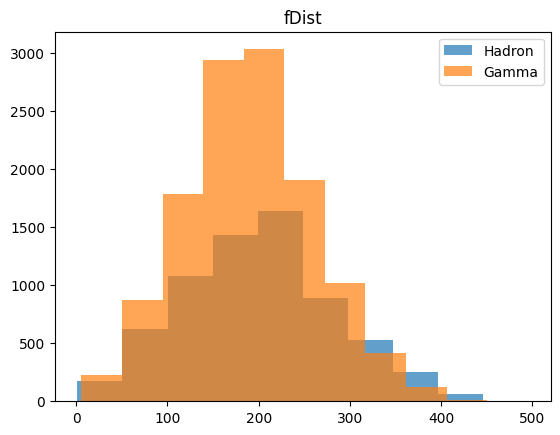

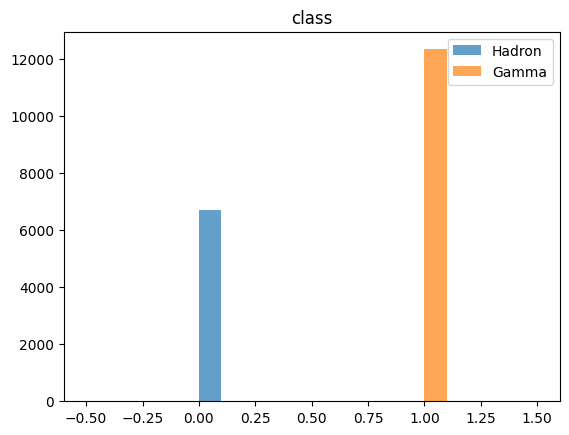

In [16]:
for titel in data.columns:
    plt.hist(data[data["class"] == 0][titel], alpha=0.7)
    plt.hist(data[data["class"] == 1][titel], alpha=0.7)
    plt.title(titel)
    plt.legend(["Hadron", "Gamma"])
    plt.show()  # Alle Diagramme zeichnen

## Daten aufteilen in Trainings-, Validierungs- und Testdatensets

Wir benötigen drei Datensets:
- Trainingsdaten
- Validierungsdaten
- Testdaten

Dafür können wir das Gesamtset nehmen und in drei Teile aufteilen.

In [22]:
training, validierung, test = np.split(data.sample(frac=1), [int(0.6 * len(data)), int(0.8 * len(data))])  # data.sample: Gibt zufällige Datensätze aus
print(len(training))
print(len(validierung))
print(len(test))

11412
3804
3804


In [29]:
print(len(training[training["class"] == 1]))  # unebene Daten sind unpraktisch für das Training
print(len(training[training["class"] == 0]))

7342
4070


## Standardisierung der Daten

Momentan sind unsere Daten verstreut über das ganze Datenset. Wir müssen daher unsere Daten standardisieren.

In [34]:
from sklearn.preprocessing import StandardScaler  # pip install scikit-learn (sklearn ist in scikit-learn enthalten)

scaler = StandardScaler()
dataToScale = training[training.columns[:-1]].values
# pd.DataFrame(dataToScale).sort_values(0)  # Vor Standardisierung
dataToScale = scaler.fit_transform(dataToScale)
# pd.DataFrame(dataToScale).sort_values(0)  # Nach Standardisierung

,0,1,2,3,4,5,6,7,8,9
11071,-1.079987,-1.061938,-1.765105,1.521420,1.155352,0.237016,-0.147484,0.261232,-0.393601,0.517179
36,-1.063831,-0.787246,-0.690937,1.610893,1.924857,0.069839,-0.299035,-0.480642,1.766212,-0.781371
4866,-1.059657,-0.765931,-0.761561,1.387210,0.903956,-0.511492,-0.418696,0.148025,0.572860,-0.611980
1933,-1.059640,-0.780029,-1.015302,2.119908,2.298797,0.441020,-0.129137,0.365026,0.337608,-0.213315
6949,-1.051630,-0.764978,-1.108129,2.123182,1.925758,-0.220183,-0.256939,0.517321,1.031094,-0.334451
...,...,...,...,...,...,...,...,...,...,...
4685,5.627925,2.024370,1.009970,-1.042206,-0.899064,6.700441,-3.676697,-2.175303,1.129448,-0.877327
5029,5.659034,6.207859,1.093070,-1.028566,-0.874736,-2.758966,-6.395435,4.911445,0.964487,1.341256
7227,5.758570,4.548755,1.445135,-0.971827,-0.888251,6.500132,-1.843095,4.038977,2.137342,0.361844
6578,5.843586,0.870148,1.588710,-1.266980,-1.200919,-7.437729,3.694492,-0.928345,1.663910,-1.449164


In [45]:
from imblearn.over_sampling import RandomOverSampler  # pip install imbalanced-learn (kompatibel mit scikit-learn)

ros = RandomOverSampler()
left, right = ros.fit_resample(dataToScale, training[training.columns[-1]])  # Hier angeben welche Spalte OverSampled werden soll

data = np.hstack((left, np.array(right).reshape(-1, 1)))

In [54]:
scaledData = pd.DataFrame(data)
print(len(scaledData[scaledData[10] == 1]))
print(len(scaledData[scaledData[10] == 0]))

7342
7342


Die anderen Datensets müssen noch standardisiert werden, dafür macht es Sinn eine Funktion zu schreiben.

In [55]:
def scale_dataset(data, oversample=False):
    left = data[data.columns[:-1]].values  # Alle Columns außer class
    right = data[data.columns[-1]].values  # Nur class
    
    scaler = StandardScaler()
    left = scaler.fit_transform(left)
    
    if oversample:
        ros = RandomOverSampler()
        left, right = ros.fit_resample(left, right)
        
    data = np.hstack((left, np.array(right).reshape(-1, 1)))
    
    return data, left, right

In [56]:
training, left_train, right_train = scale_dataset(training, oversample=True)
validierung, left_valid, right_valid = scale_dataset(validierung, oversample=False)
test, left_test, right_test = scale_dataset(test, oversample=False)

## Verschiedene einfache Algorithmen

k-nearest-neighbors (kNN)
- 2 Informationen, Daten sind klassifiziert auf dem Graph
- Jetzt kommt ein neuer Punkt ohne Klasse
    - Dieser Punkt soll jetzt klassifiziert werden
- Anhand der nähesten Nachbarn wird die Information ergänzt (Anz. Nachbarn: K-Wert)
- K-Wert muss ungerade sein (keine Unentschieden möglich)
- Auch mit mehr als 2 Dimensionen möglich

In [65]:
from sklearn.metrics import classification_report

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(left_train, right_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
prediction = knn_model.predict(left_test)

In [67]:
print(classification_report(right_test, prediction))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1300
           1       0.86      0.85      0.86      2504

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes
- Klassifizierungen und Tabellen
- Wahrscheinlichkeiten von den Tabellen
- Durchschnitt von allen Wahrscheinlichkeiten berechen und dann den Mittelwert nehmen
- Das Ergebnis mit 50% vergleichen

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
nb_model = GaussianNB()
nb_model = nb_model.fit(left_train, right_train)

In [70]:
prediction = nb_model.predict(left_test)

In [72]:
print(classification_report(right_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.42      0.53      1300
           1       0.75      0.90      0.82      2504

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



## Logistische Regression

Die Datenpunkte werden bei 0 und 1 platziert.

Danach wird eine S-Kurve berechnet und danach wird einfach geschaut ob der neue Datenpunkt über oder unter der Mitellinie ist.

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(left_train, right_train)

In [75]:
prediction = lr_model.predict(left_test)

In [77]:
print(classification_report(right_test, prediction))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1300
           1       0.86      0.82      0.84      2504

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



## Support Vector Machines

- Suche den nähesten Punkt links und rechts des Vektors und berechne die Distanz zum Mittelvektor von beiden Punkten
- Neuer Punkt wird eingefügt
- Äußerer Vektor wird dann wieder verschoben

In [79]:
from sklearn.svm import SVC

In [80]:
svm_model = SVC()
svm_model = svm_model.fit(left_train, right_train)

In [81]:
prediction = svm_model.predict(left_test)

In [82]:
print(classification_report(right_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1300
           1       0.90      0.89      0.90      2504

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neurales Netzwerk

Wir können jetzt anstatt von vordefinierten Modell ein eigenes Modell erstellen mittels Tensorflow.

In [84]:
import tensorflow as tf

In [87]:
#model = Sequential()
#model.add()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)),  # 10 = Anzahl Spalten unserer Daten
    # Rectified Linear Unit: Machine Learning Funktionen sollten generell einen Wert zw. 0 und 1 geben
    # Sigmoid und TanH sind beliebt
    # ReLU bietet sich hier an, weil sie simpel ist (weil linear) und dadurch günstig
    tf.keras.layers.Dropout(0.2), # Overfitting verhindern (Verhindern das das Modell sich zu sehr auf die Daten anpasst, was neue Daten schwieriger zum interpretieren macht)
    tf.keras.layers.Dense(32, activation="relu"),  # input_shape kommt hier vom vorherigen Layer
    tf.keras.layers.Dropout(0.2),  # Wahrscheinlichkeit: 20%
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001), # Lernrate hier angeben  # Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
              loss="binary_crossentropy",  # Für einen Binäroutput
              metrics=["accuracy"])  # Accuracy messen

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                352       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [89]:
history = model.fit(left_train, right_train,
          epochs=100,  # Anzahl Durchläufe
          batch_size=16,  # Anzahl Teile die per Durchlauf separat behandelt werden
          verbose=1)  # Output Ja/Nein

Epoch 1/100
918/918 [==============================] - 2s 1ms/step - loss: 0.4382 - accuracy: 0.7955
Epoch 2/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3808 - accuracy: 0.8310
Epoch 3/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3651 - accuracy: 0.8413
Epoch 4/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3553 - accuracy: 0.8455
Epoch 5/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3483 - accuracy: 0.8476
Epoch 6/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3425 - accuracy: 0.8500
Epoch 7/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3376 - accuracy: 0.8524
Epoch 8/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3351 - accuracy: 0.8554
Epoch 9/100
918/918 [==============================] - 1s 1ms/step - loss: 0.3314 - accuracy: 0.8556
Epoch 10/100
918/918 [==============================] - 1s 2ms/step - loss: 0.3290 - accura

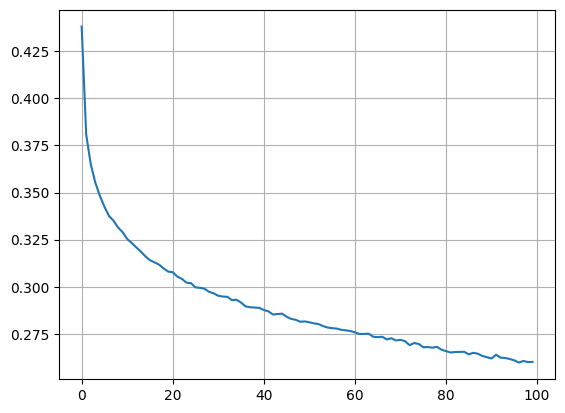

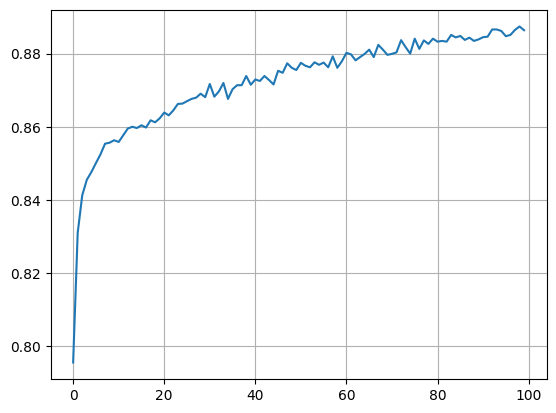

In [97]:
plt.plot(history.history["loss"])
plt.grid(True)
plt.show()

plt.plot(history.history["accuracy"])
plt.grid(True)

In [98]:
model.evaluate(left_valid, right_valid)  # Neue Daten für das Modell (Loss & Accuracy sind schlechter, weil neue Daten)

119/119 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8559


[0.3335185647010803, 0.855941116809845]

In [114]:
prediction = model.predict(left_test)  # Kommazahlen zwischen 0 und 1, >= 0.5 -> 1, < 0.5 -> 0
left_real = pd.DataFrame(left_test)
left_real["Prediction"] = (prediction >= 0.5).astype(int).reshape(-1)
left_real["Actual"] = right_test

pred_count = left_real["Prediction"].value_counts()
print(pred_count)

actual_count = left_real["Actual"].value_counts()
print(actual_count)

print(f"% 1: {np.power(pred_count[0] / actual_count[0], -1)}")  # Prozente berechnen
print(f"% 0: {pred_count[1] / actual_count[1]}")

119/119 [==============================] - 0s 1ms/step
1    2450
0    1354
Name: Prediction, dtype: int64
1    2504
0    1300
Name: Actual, dtype: int64
% 1: 0.9601181683899557
% 0: 0.9784345047923323
